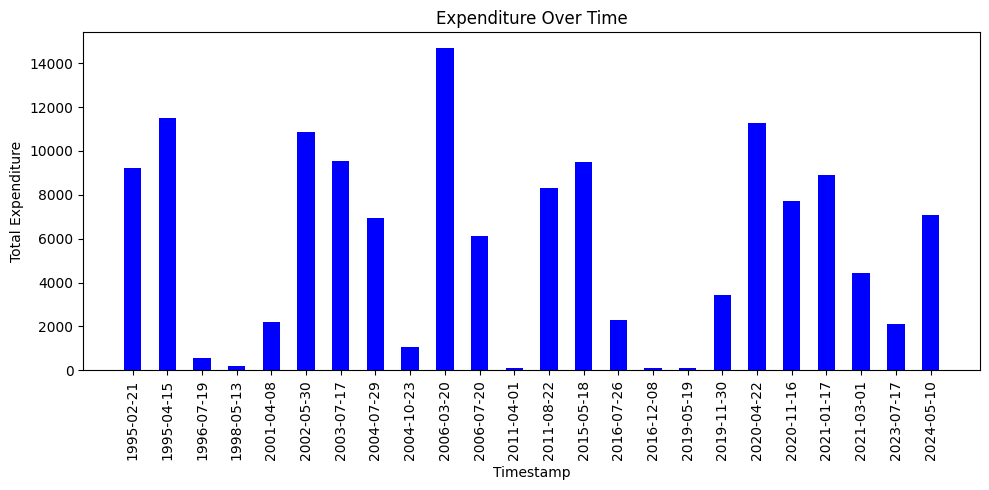

In [0]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

spark = SparkSession.builder.appName("SalesDataDisplay").getOrCreate()

# json_file_path = "dbfs:/FileStore/sales_data/sample_sales.json"
# delta_table_path = "dbfs:/FileStore/sales_data/delta_table"

delta_table_path = "file:/tmp/delta_table"

# df = spark.read.json(json_file_path)
# df.write.format("delta").mode("overwrite").save(delta_table_path)

df = spark.read.format("delta").load(delta_table_path)

data = df.select("timestamp", "quantity", "price", "category").collect()

if data:
    timestamps = [row.timestamp for row in data]  
    total_expenditure = [row.quantity * row.price for row in data]

    bef_sort_data = list(zip(timestamps, total_expenditure))
    sorted_data = sorted(bef_sort_data, key=lambda x: x[0])
    sorted_timestamps, sorted_total_expenditure = zip(*sorted_data)

    plt.figure(figsize=(10, 5))
    # plt.plot(timestamps, quantities, marker='o', linestyle='-', color='b')
    # plt.bar(timestamps, quantities, color='b', width=0.5)
    plt.bar(sorted_timestamps, sorted_total_expenditure, color='b', width=0.5)
    plt.title("Expenditure Over Time")
    plt.xlabel("Timestamp")
    plt.ylabel("Total Expenditure")
    plt.xticks(rotation=90)  
    plt.tight_layout()  
    # plt.grid()  
    plt.show()
else:
    print("No data available in the DataFrame.")
